<img src="https://marketing4ecommerce.net/wp-content/uploads/2015/09/logo-iebs.jpg" style="float:right" width="200">

### **Análisis supervisado I: Proyecto** - *Evaluación del estado de salud de un bebé durante el parto*

## Fase 1: Carga de datos y análisis descriptivo.

In [ ]:
# IMPORTACION DE LIBRERIAS
import numpy as np
import pandas as pd

# LIBRERIAS PARA HACER GRAFICOS
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

In [ ]:
# CARGA DEL FICHERO DE DATOS
file = '/content/data/ASI_casoPractico.csv'
data = pd.read_csv(file, sep = ';')
data.head().T

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
b,240.0,5.0,177.0,411.0,533.0
e,357.0,632.0,779.0,1192.0,1147.0
LBE,120.0,132.0,133.0,134.0,132.0
AC,0.0,4.0,2.0,2.0,4.0
FM,0.0,0.0,0.0,0.0,0.0
UC,0.0,4.0,5.0,6.0,5.0
ASTV,73.0,17.0,16.0,16.0,16.0
MSTV,0.5,2.1,2.1,2.4,2.4
ALTV,43.0,0.0,0.0,0.0,0.0


In [ ]:
# INFORMACION DEL CONJUNTO DE DATOS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2126 non-null   int64  
 1   b         2126 non-null   int64  
 2   e         2126 non-null   int64  
 3   LBE       2126 non-null   int64  
 4   AC        2126 non-null   int64  
 5   FM        2126 non-null   int64  
 6   UC        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  DL        2126 non-null   int64  
 12  DS        2126 non-null   int64  
 13  DP        2126 non-null   int64  
 14  DR        2126 non-null   int64  
 15  Width     2126 non-null   int64  
 16  Min       2126 non-null   int64  
 17  Max       2126 non-null   int64  
 18  Nmax      2126 non-null   int64  
 19  Nzeros    2126 non-null   int64  
 20  Mode      2126 non-null   int6

In [ ]:
# NUMERO DE VALORES UNICOS PARA CADA VARIABLE
data.agg(['nunique']).T

,nunique
ID,2126
b,979
e,1064
LBE,48
AC,22
FM,96
UC,19
ASTV,75
MSTV,57
ALTV,87


In [ ]:
# ELIMINAR COUMNAS NO NECESARIAS
data = data.drop(["ID","b","e","DR"], axis = 1)
data.head().T

,0,1,2,3,4
LBE,120.0,132.0,133.0,134.0,132.0
AC,0.0,4.0,2.0,2.0,4.0
FM,0.0,0.0,0.0,0.0,0.0
UC,0.0,4.0,5.0,6.0,5.0
ASTV,73.0,17.0,16.0,16.0,16.0
MSTV,0.5,2.1,2.1,2.4,2.4
ALTV,43.0,0.0,0.0,0.0,0.0
MLTV,2.4,10.4,13.4,23.0,19.9
DL,0.0,2.0,2.0,2.0,0.0
DS,0.0,0.0,0.0,0.0,0.0


In [ ]:
# MEDIDAS DE CENTRALIZACION, LOCALIZACION Y DISPERION
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


0    1655
1     471
Name: Target, dtype: int64


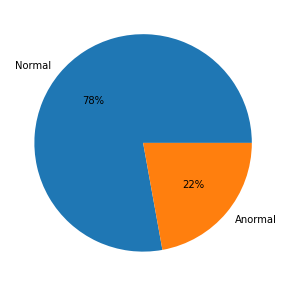

In [ ]:
# DISTRIBUCION DE FRECUENCIAS DEL TARGET
a, b = data['Target'].value_counts()
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.pie([a, b], labels=["Normal", "Anormal"], autopct="%1.0f%%")
print(data["Target"].value_counts())

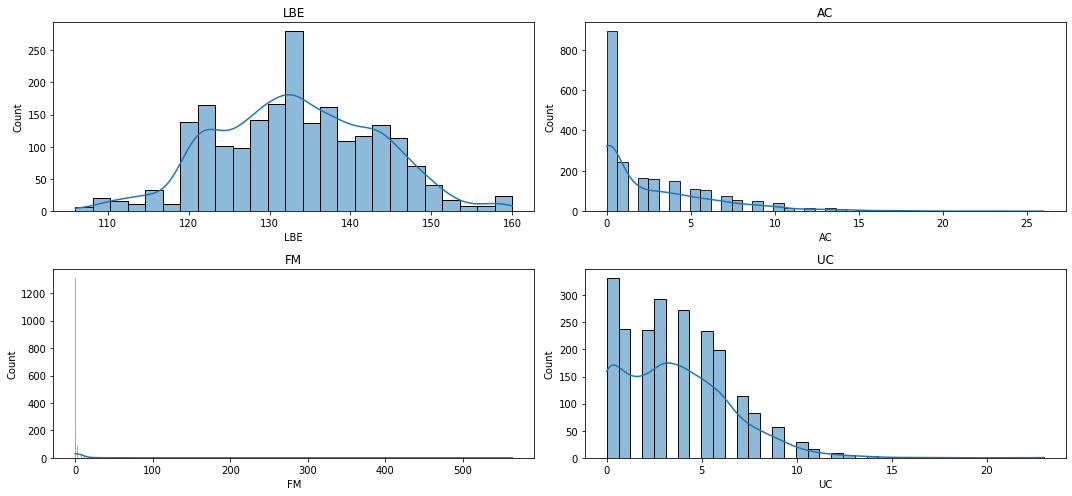

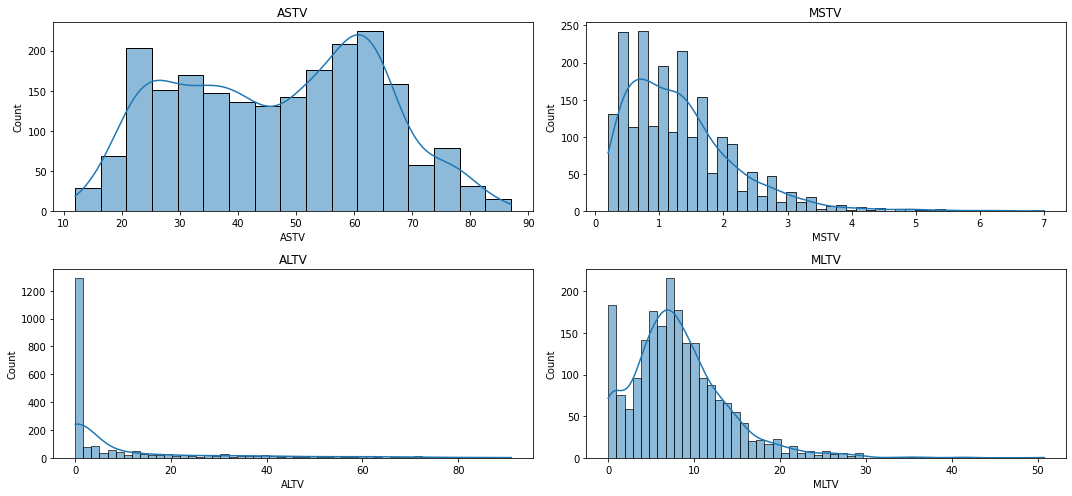

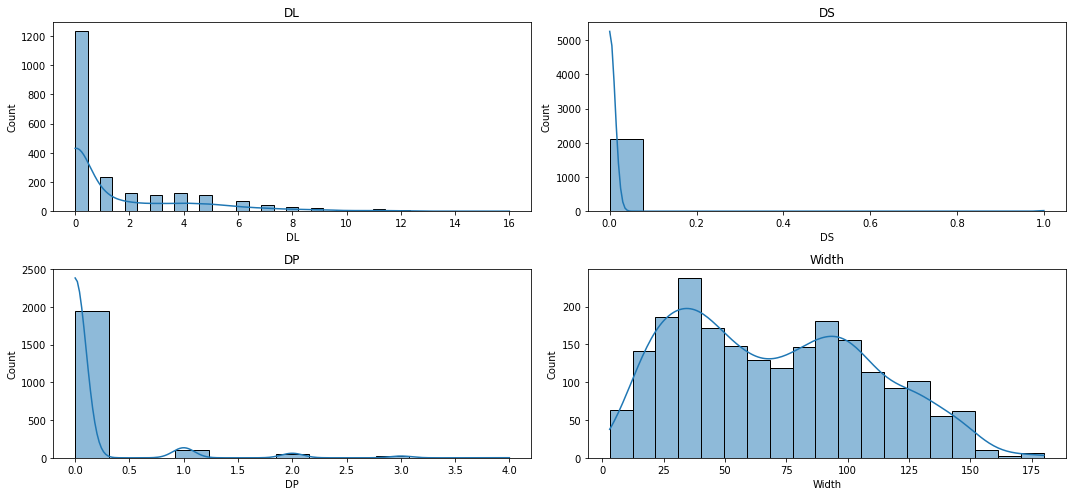

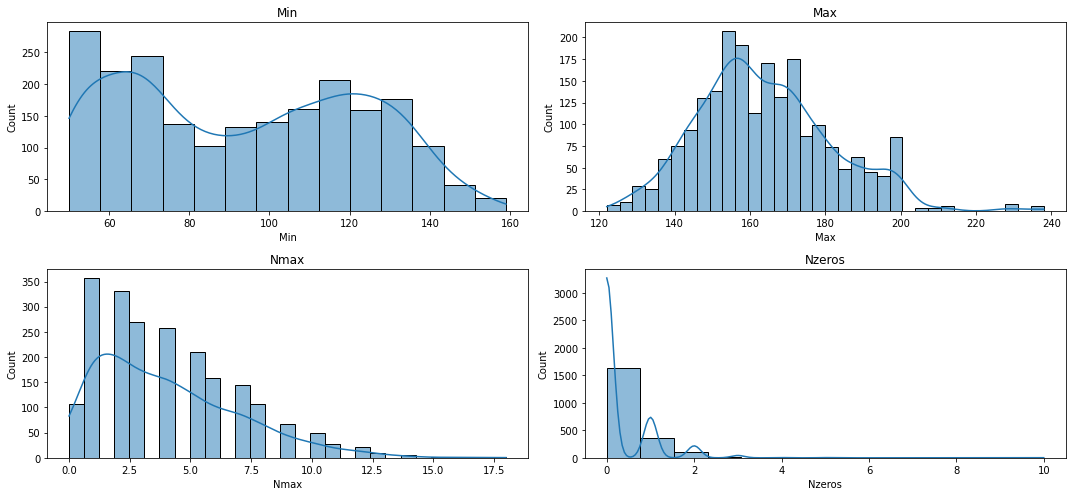

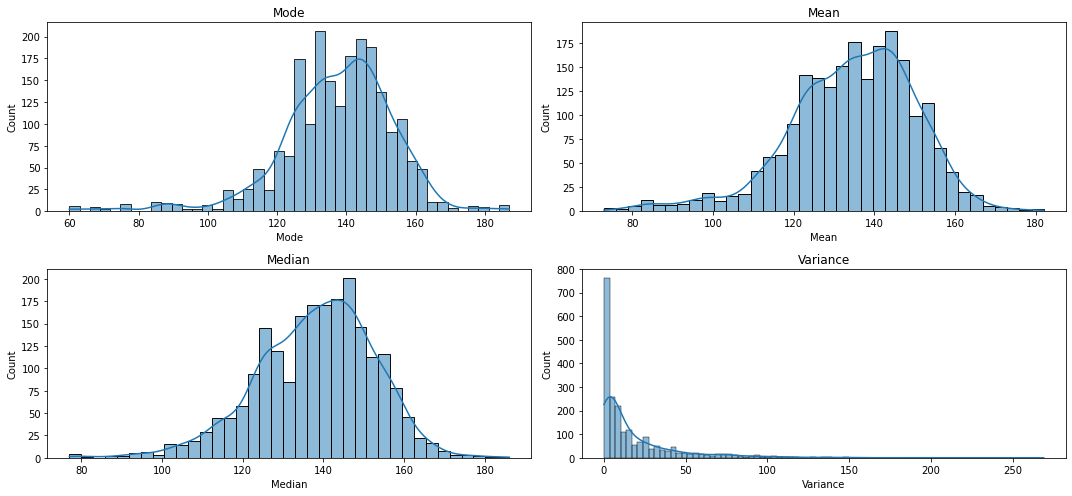

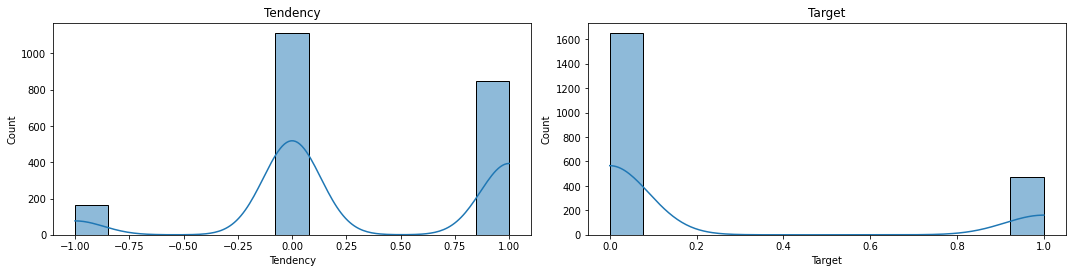

In [ ]:
# Visualizaciones adicionales

# Histogramas de mis variables

num_variables = data.shape[1] # número de variables en el conjunto de datos
num_figs = (num_variables - 1) // 4 + 1 # número de figuras necesarias

# Dibujar histogramas individuales para cada variable
for i in range(num_figs):
    plt.figure(figsize=(15, 7))
    for j in range(4):
        if 4 * i + j < num_variables:
            plt.subplot(2, 2, j + 1)
            sns.histplot(data.iloc[:, 4 * i + j],kde=True)
            plt.title(data.columns[4 * i + j])
    plt.tight_layout()
    plt.show()


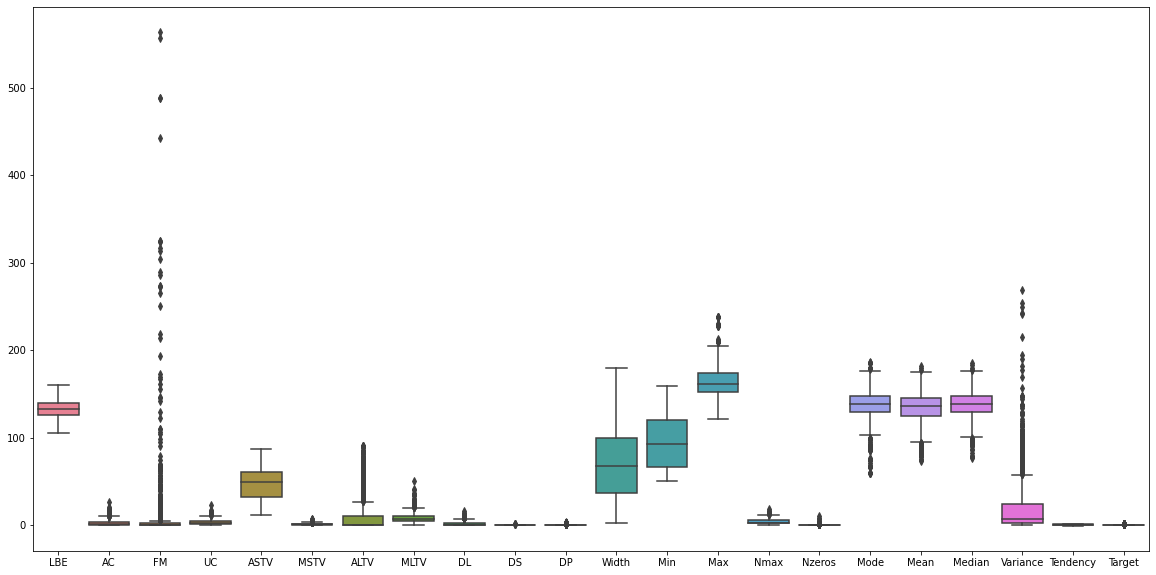

In [ ]:
# Boxplot de mis variables
palette = sns.color_palette("husl", 22)
plt.figure(figsize=(20,10))
sns.boxplot(data=data, palette=palette)
plt.show()

Con toda la información anterior que hemos obtenido vamos a continuación a hacer algunos comentarios sobre nuestro conjunto de datos:

- 26 variables iniciales (posteriormente veremos que no nos sirven todas para nuestro estudio) y 2126 instancias. No tenemos datos faltantes en ninguna de nuestras variables por lo que no realizaremos al respecto ningún preprocesamiento previo de los datos.
- Hemos eliminado de nuestro dataset aquellas variables que no eran relevantes para nuestro análisis. Por ejemplo, tenemos la variable "DR" que es un único valor y no nos sirve para modelizar.
- Nuestro dataset consta de:

1.   Cinco variables discretas: DL, DS, DP, NMAX y Nzeros.
2.   Una variable cualitativa politómica: Tendency.
3.   El resto de variables son cuantitativas contínuas salvo nuestro Target que es una Variable cualitativa dicotómica.
- Como vemos en nuestro gráfico de tarta: La proporción de estados fetales normales es 77.85 % y la proporción de estados fetales anormales es 22.15 %.
- Vemos en la distribución de frecuencias de los histogramas que algunas variables siguen distribuciones semejantes a la normal (LBE, mean, mode) y otras distribuciones que como vemos en nuestros boxplot nos muestran muchos datos que podríamos suponer a priori como atípicos u outliers. Esto es debido a que la mayoría de los datos se concentran en un rango pequeño y el resto de valores se alejan bastante de la media, suele ser habitual en distribuciones de cola pesada (FM, Variance).

---
- Vamos a continuación a realizar el mapa de correlaciones que nos servirá para determinar si la hipótesis de independencia de las variables explicativas se cumple (el valor de una variable explicativa no afecta el valor de otra), condición necesaria para el algoritmo de Naive Bayes:

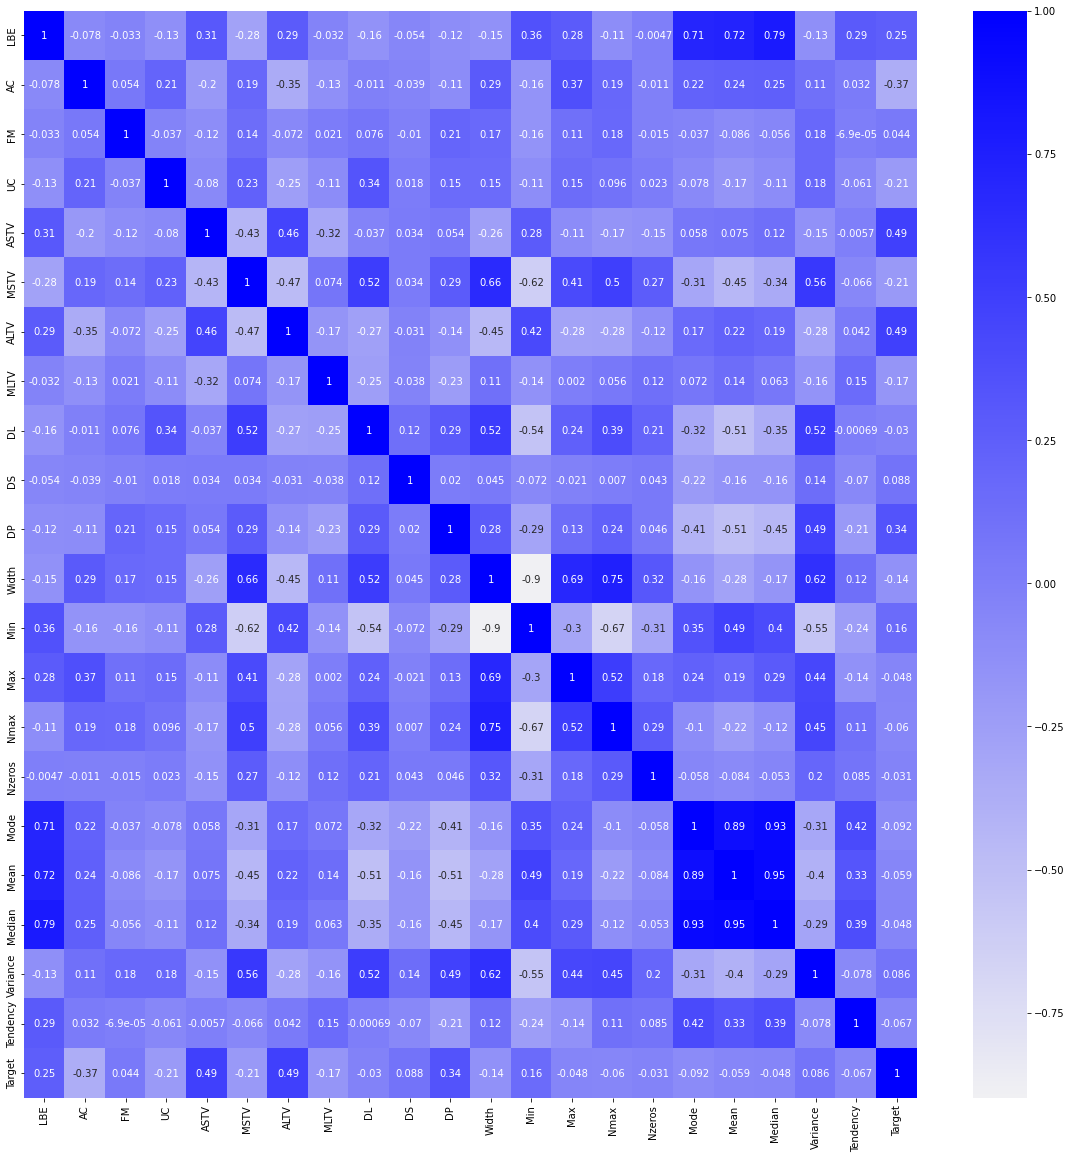

In [ ]:
plt.figure(figsize=(20,20))
corr = data.corr()
cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)

Como podemos ver en nuestro mapa de correlaciones hay algunas variables que tienen relaciones fuertes (como por ejemplo las 3 variables de la media, la moda y la mediana) pero por lo general se cumple nuestra hipótesis de independencia.

Si nos fijamos en la última fila, nuestra variable objetivo "Target", tenemos 3 variables con más acusada relación lineal con ella, pero no demasiado fuerte.

Estas son: **ASTV** = 0.49 (El Porcentaje de tiempo con variabilidad anormal a corto plazo), **ALTV** = 0.49 (El porcentaje de tiempo con variabilidad anormal a largo plazo) y **LBE** = 0.34( El Número de aceleraciones por segundo). Es una correlación "moderada en términos estadísticos" pero significativamente con más acusada relación lineal que las variables restantes. Podríamos establecer con cierta relación causal que a medida que aumenten las variabilidades anormales a corto y largo plazo y de igual modo, aumenten las aceleraciones por segundo hay más probabilidades de que el feto presente anormalidades.



## Fase 2: Muestreo. Conjunto de entrenamiento y test.

Para el muestreo he decidido utilizar un 30% para el test. Hemos visto en las clases anteriores que con un 40% se evalúa adecuadamente el modelo. Quiero evaluar con una nueva relación para ver cómo se comporta en este caso. Al final, elegiremos aquel que se adapte mejor al problema.

In [ ]:
# 1 - Cargaremos la librería de Scikit learn donde tenemos la función que usaremos para dividir nuestro conjunto de datos: train_test_split()
from sklearn.model_selection import train_test_split

# 2 - Creamos, como hemos visto en la clase, un grupo con las variables explicativas y otro con la variable objetivo:

X = data.loc[:, data.columns != "Target"] # seleccionamos todas las variables explicativas salvo target
y = data.loc[:, data.columns == "Target"] # Selecciono solo target

# 3 - Creamos el conjunto de entrenamiento y el de test con el primero al 70%
# Utilizaremos random_state = 42, puesto que he visto que es una convención (aunque vale cualquiera, evidentemente)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
# Podemos comprobar que están correctos los tamaños de los conjuntos:
print(f"Conjunto de test - {X_test.shape[0]}\nConjunto de entrenamiento - {X_train.shape[0]}")

Conjunto de test - 638
Conjunto de entrenamiento - 1488


## Fase 3: Ajuste del algoritmo de Naive Bayes.

In [ ]:
# 1 - Importamos las librerías necesarias
# En el caso del algoritmo de Naive Bayes debemos elegir entre Bernouilli, Multinomial y Gaussian en función de la naturaleza de las variables explicativas.
# Usaremos la familia GaussianNB puesto que la mayoría de nuestras variables son de tipo contínuo

from sklearn.naive_bayes import GaussianNB

# 2 - Definimos el modelo

gnb = GaussianNB()

modelNB = gnb.fit(X_train, y_train.values.ravel()) # Evitamos el error que nos aparece en nuestro conjunto y.train con values.ravel()

# Para evaluar el ajuste del modelo predecimos la variable objetivo para el conjunto de entrenamiento y de test

y_pred_train = modelNB.predict_proba(X_train)
y_pred_test = modelNB.predict_proba(X_test)

Seguimos el orden marcado en las fases del proyecto y no efectuaremos todavía la validación del modelo. Lo haremos en la fase 5.

## Fase 4: Ajuste del algoritmo de Support Vector Machine.

In [ ]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# SVM Lineal
svmLineal = svm.SVC(C = 1,kernel='linear',degree = 1,probability = True)

# Ajuste del modelo
svmLineal.fit(X_train, y_train)

# Para evaluar el ajuste del modelo predecimos la variable objetivo para el conjunto de entrenamiento y de test
y_proba_train_svm = svmLineal.predict_proba(X_train) # Pedimos las probabilidades
y_proba_test_svm = svmLineal.predict_proba(X_test) # Pedimos las probabilidades

A continuación, realizaremos la validación de ambos modelos con la curva ROC, area bajo la curva y demás elementos.

## Fase 5: Validación del algoritmo escogido a partir de la curva ROC, el área bajo la curva, la matriz de confusión y la precisión. Evaluar si existe sobreajuste.

- **NAIVE BAYES**

In [ ]:
# 1 - Para calcular la curva ROC necesitamos calcular la tasa de falsos positivos "fpr" - false positive rate y la tasa de verdaderos positivos "tpr"

# Y calculamos la curva ROC y el area AUC para entrenamiento.
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

In [ ]:
# 2 - Y también calculamos la curva ROC y el Area Bajo la Curva para el conjunto de test.
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

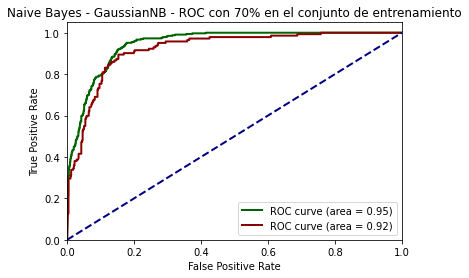

In [ ]:
# 3 - Ahora vamos a ver cómo queda nuestro gráfico con nuestro 70% de observaciones en nuestro conjunto de entrenamiento

plt.figure()
lw = 2

plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_test,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes - GaussianNB - ROC con 70% en el conjunto de entrenamiento")
plt.legend(loc="lower right")
plt.show()

Vemos que ajusta bien. El conjunto de entrenamiento da un AUC de 0.95 y el de test 0.92. Tenemos un poco de discrepancia pero las curvas van bastante parejas. Y en términos de AUC vemos que hay una diferencia de 0.03 puntos que está bien. Esto me indica que el modelo es bueno (un AUC en test en 0.92 así lo muestra, es muy bueno) y además no hay mucho sobreajuste ya que hay una diferencia en términos de AUC de 0.03. Podemos decir que el AUC en el conjunto de entrenamiento y en el conjunto de prueba es similar, por lo que es probable que el modelo se haya ajustado adecuadamente a los datos de entrenamiento y generalice bien a los datos desconocidos, no hay sobreajuste. Por lo tanto, el conjunto de variables de entrenamiento me permite separar las clases (el fetal normal y anormal) con buena precisión, con un AUC de 0.92 en test.

De todas formas, hemos de tener en cuenta que nuestra hipótesis con un conjunto de entrenamiento al 70% no mejora los resultados que obtuvimos al 60% con nuestro algoritmo de Naive Bayes. En aquel caso obteníamos la siguiente curva:
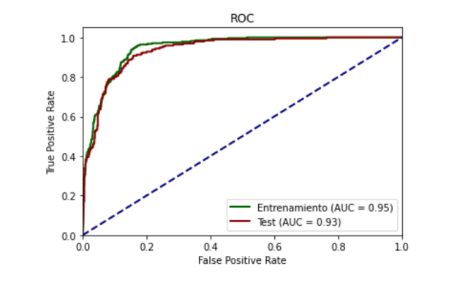

Por tanto, si tuvieramos que elegir entre los dos modelos de Naive Bayes lo correcto sería quedarnos con este segundo caso puesto que se adapta mejor a nuestro problema.

Vamos a calcular ahora nuestra matriz de confusión, la sensibilidad y la especificidad:

In [ ]:
# Importamos la librería de sklearn para la matriz de confusión
from sklearn.metrics import confusion_matrix

# No podemos sacar la matriz de confusión con las probabilidades, lo convertimos a binario
y_train_pred = np.round(y_pred_train[:, 1])
y_test_pred = np.round(y_pred_test[:, 1])

# Calculamos la matriz de confusión
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

# Ahora vamos determinando las tasas dentro de nuestras matrices y calculamos la sensibilidad y la especificidad
TP_train = confusion_matrix_train[1, 1]
TN_train = confusion_matrix_train[0, 0]
FP_train = confusion_matrix_train[0, 1]
FN_train = confusion_matrix_train[1, 0]
sensibilidad_train = TP_train / (TP_train + FN_train)
especificidad_train = TN_train / (TN_train + FP_train)

TP_test = confusion_matrix_test[1, 1]
TN_test = confusion_matrix_test[0, 0]
FP_test = confusion_matrix_test[0, 1]
FN_test = confusion_matrix_test[1, 0]
sensibilidad_test = TP_test / (TP_test + FN_test)
especificidad_test = TN_test / (TN_test + FP_test)

# Imprimir resultados
print("Matriz de confusión (train):\n", confusion_matrix_train)
print("Sensibilidad (train):", sensibilidad_train.round(3))
print("Especificidad (train):", especificidad_train.round(2))
print("\nMatriz de confusión (test):\n", confusion_matrix_test)
print("Sensibilidad (test):", sensibilidad_test.round(2))
print("Especificidad (test):", especificidad_test.round(2))

Matriz de confusión (train):
 [[1089   70]
 [ 100  229]]
Sensibilidad (train): 0.696
Especificidad (train): 0.94

Matriz de confusión (test):
 [[451  45]
 [ 44  98]]
Sensibilidad (test): 0.69
Especificidad (test): 0.91


Vemos por tanto en nuestro test que clasifica correctamente el 91% de los casos en que el feto es normal (especificidad) y 69% cuando el feto es anormal (sensibilidad).

---
- **Support Vector Machine**

In [ ]:
# Entrenamiento
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_train_svm[:, 1]) # Ya no tenemos array 1D
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)
#
# Test
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_test_svm[:, 1]) # Ya no tenemos array 1D
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

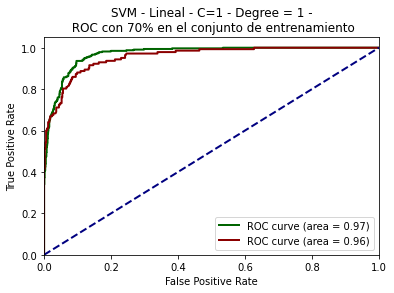

In [ ]:
# Curva ROC y AUC
plt.figure()
lw = 2

plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_test_svm,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM - Lineal - C=1 - Degree = 1 -\n ROC con 70% en el conjunto de entrenamiento")
plt.legend(loc="lower right")
plt.show()

Aquí podemos observar que hemos obtenido unos mejores resultados que con los dos modelos anteriores de Naive Bayes, con sus 70% y 60% en los conjuntos de entrenamiento.

El AUC en el conjunto de entrenamiento es de 0.97 y el AUC del conjunto de test es de 0.96, por lo que nuestro modelo funciona muy bien y tiene menos sobreajuste que aquellos modelos. Tenemos prácticamente el mismo valor en ambos conjuntos por lo que podemos deducir que nuestro modelo ha aprendido de manera adecuada con los datos de entrenamiento y generalizará bien a los datos desconocidos.

Vamos a calcular ahora nuestra matriz de confusión, la sensibilidad y la especificidad:

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_true_train = y_train.values.ravel() # Utilizamos .ravel para convertirlo en un array unidimensional para que no nos dé error
y_true_test = y_test.values.ravel()

# Predicciones en el set de entrenamiento
y_pred_train = svmLineal.predict(X_train)
cm_train = confusion_matrix(y_true_train, y_pred_train)

# Predicciones en el set de prueba
y_pred_test = svmLineal.predict(X_test)
cm_test = confusion_matrix(y_true_test, y_pred_test)

# Ahora vamos determinando las tasas dentro de nuestras matrices y calculamos la sensibilidad y la especificidad
TP_train = cm_train[1, 1]
TN_train = cm_train[0, 0]
FP_train = cm_train[0, 1]
FN_train = cm_train[1, 0]
sensibilidad_train = TP_train / (TP_train + FN_train)
especificidad_train = TN_train / (TN_train + FP_train)

TP_test = cm_test[1, 1]
TN_test = cm_test[0, 0]
FP_test = cm_test[0, 1]
FN_test = cm_test[1, 0]
sensibilidad_test = TP_test / (TP_test + FN_test)
especificidad_test = TN_test / (TN_test + FP_test)

print("Matriz de confusión en el set de entrenamiento:")
print(cm_train)
print("Sensibilidad (train):", sensibilidad_train.round(3))
print("Especificidad (train):", especificidad_train.round(2))
print("\nMatriz de confusión en el set de prueba:")
print(cm_test)
print("Sensibilidad (test):", sensibilidad_test.round(2))
print("Especificidad (test):", especificidad_test.round(2))

Matriz de confusión en el set de entrenamiento:
[[1099   60]
 [  64  265]]
Sensibilidad (train): 0.805
Especificidad (train): 0.95

Matriz de confusión en el set de prueba:
[[458  38]
 [ 24 118]]
Sensibilidad (test): 0.83
Especificidad (test): 0.92


Vemos por tanto en nuestro test que clasifica correctamente el 92% de los casos en que el feto es normal (especificidad) y 83% cuando el feto es anormal (sensibilidad).

Por último, vamos a tratar de buscar nuevas combinaciones en nuestro algoritmo de SVM para ver si podemos optimizar nuestro modelo.

## Fase adicional: Búsqueda de la mejor combinación de hiperparámetros en el algoritmo de SVM utilizando la función Grid Search de Scikit Learn.

In [ ]:
# Importamos la clase
from sklearn.model_selection import GridSearchCV

# Hiperparametros
param_grid = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [0.1,1,10]},
# Primero con kernel de tipo gausiano, con don gammas con esos dos valores y con el parámetro de regularización "C" con esos 3 valores. Se realizarán un total de 6 pruebas distintas.

    {"kernel": ["linear"], "C": [0.1,1,10]},
# Ahora utilizo un kernel lineal con esos 3 valores de regularización.

    {"kernel": ["poly"], "C": [0.1,1,10], "degree": [2,3]},
# Y por último, un kernel polinomial con esas 3 valores de regularización y que sea de grado 2 y grado 3.
]
# Con esto tengo definida la malla que quiero probar.

In [ ]:
# Ahora metemos nuestra función GridSearchCV en la variable grid
grid = GridSearchCV(
        estimator  = SVC(), # qué algoritmo vamos a usar
        param_grid = param_grid, # le damos la malla que hemos definido ahí arriba
        scoring    = 'roc_auc', # roc_auc, accuracy / le pedimos uno de los dos, hemos pedido solo el auc
        n_jobs     = -1, # el número de trabajos hasta que acabe
        cv         = 3,
        verbose    = 0,
        return_train_score = True # que devuelva el score del train
      )

grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10], 'degree': [2, 3],
                          'kernel': ['poly']}],
             return_train_score=True, scoring='roc_auc')

Ya se ha ejecutado, vamos a ver los resultados:

In [ ]:
# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_) # Metemos los resultados en un dataframe
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_C,param_gamma,param_kernel,param_degree,mean_test_score,std_test_score,mean_train_score,std_train_score
7,1,NaN,linear,NaN,0.966167,0.002333,0.971445,0.002500
8,10,NaN,linear,NaN,0.964544,0.002041,0.971465,0.002259
6,0.1,NaN,linear,NaN,0.964133,0.002771,0.969184,0.002222
5,10,0.0001,rbf,NaN,0.962605,0.005177,0.982012,0.000508
3,1,0.0001,rbf,NaN,0.952583,0.008522,0.963092,0.002262
4,10,0.001,rbf,NaN,0.951442,0.012462,0.999754,0.000087
2,1,0.001,rbf,NaN,0.948006,0.006955,0.989910,0.001423
14,10,NaN,poly,3,0.947564,0.010017,0.957443,0.004953
13,10,NaN,poly,2,0.943011,0.009818,0.948227,0.002886
0,0.1,0.001,rbf,NaN,0.932393,0.011906,0.961695,0.000577


Con la sentencia de código de arriba las he ordenado por la bondad del ajuste.

La que mejor está funcionando en términos de conjunto de entrenamiento y test sería la primera con kernel lineal, con C=1 y me da un AUC en test de 0.96 y un AUC en train de 0.97. Por lo que podemos comprobar que la combinación que usamos anteriormente es la óptima.

El mejor SVM posible es el que tiene kernel lineal y una C de 1, aunque el resto de combinaciones tienen unos scores muy parecidos. En concreto vemos que el segundo caso, con un kernel "linear" y con un parámetro de regularización C=10 tiene mejor score en el conjunto de entrenamiento para un score en test similar, pero ligeramente inferior. Aunque podríamos interpretar ambas combinaciones como similares sin equivocarnos demasiado, **debemos elegir la combinación que tenga un mejor rendimiento en el conjunto de prueba ya que nuestro objetivo final es generalizar bien a datos desconocidos** y ese será el conjunto de datos que se utilizará para evaluar la capacidad de generalización de tu modelo.

Por último, con respecto a la hipótesis que hemos planteado con un conjunto de entrenamiento al 70% podemos decir que mejoramos la situación en donde la considerábamos al 60%, porque en aquel caso obteníamos un AUC en test de 0.9611 y aquí hemos obtenido un área algo mayor - 0.9661.

---




Con el siguiente código veremos una comparación de la curva de Naive Bayes frente a la mejor combinación de SVM

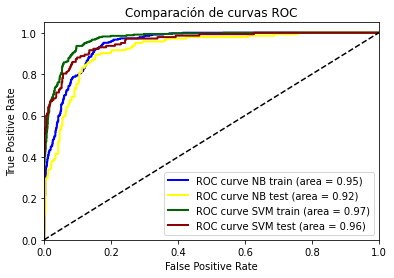

In [ ]:
plt.figure()

plt.plot(fpr_train,tpr_train,color="blue",lw=lw,label="ROC curve NB train (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="yellow",lw=lw,label="ROC curve NB test (area = %0.2f)" % roc_auc_test,)
plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=lw,label="ROC curve SVM train (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve SVM test (area = %0.2f)" % roc_auc_test_svm,)


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparación de curvas ROC')
plt.legend(loc="lower right")
plt.show()

Así que a modo de conclusión:

- El modelo de SVM con un kernel lineal y parámetro de regularización C=1 es **el que obtiene mejor rendimiento**, como podemos ver en las gráficas y en las tablas con los resultados de las áreas en los conjuntos de entrenamiento y test.

- Al utilizar la función de GridSearch para buscar la mejor combinación de parámetros, hemos visto que la primera que habíamos utilizado, aquella combinación con la que sacamos la curva ROC, es la mejor.

- Se obtiene un rendimiento superior en el algoritmo de SVM al utilizar un modelo al 70% en el conjunto de train que evaluándolo al 60%.

- Nuestro modelo de SVM obtiene mejor especificidad y sensibilidad que nuestro modelo con el algoritmo de NB. En el primer caso obteníamos para el conjunto de test 92% (especificidad) y 83% (sensibilidad) y para el segundo obteníamos 91% y 69% respectivamente.